# Общая информация
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Шаг 1.** Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv.  

**Шаг 2.** Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  

**Шаг 3.** Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

**Шаг 4.** Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

**Шаг 5.** Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.  

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.  

**Шаг 6.** Напишите общий вывод

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными

## Изучение данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

Данные представлены в виде датасета games.csv. Откроем его, выведем 5 строк, просмотрим информацию с помощью метода .info()

In [2]:
path_local = r'games.csv'
path_ya = r'/datasets/games.csv'

# чтение файла с данными в случае локальной работы и сохранение в data
try:
    df_raw = pd.read_csv(path_local)
# чтение файла с данными в случае работы online и сохранение в data
except:
    df_raw = pd.read_csv(path_ya) 

df_raw.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Колличество явных дубликатов

In [4]:
df_raw.duplicated().sum()

0

Колличество пропусков

In [5]:
df_raw.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод
Предварительно можно утверждать, что данных достаточно для проверки гипотез.
Чтобы двигаться дальше, нужно произвести предобработку данных.

## Предобработка данных

Названия столбцов не соответствуют 'змеиному стилю'. Переименуем их

In [6]:
df_raw.columns = df_raw.columns.str.lower()
df_raw.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Замена пропусков

#### Столбцы 'name', 'genre'

Расcмотрим пропуски в столбце 'name'

In [7]:
df_raw.query("name.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Без названия игры невозможно восстановить жанр игры. Можем смело удалить эти строки

In [8]:
# удаляем пропуски
df_raw = df_raw.dropna(subset=['name'])

# проверяем удаление
df_raw.query("name.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Столбец 'critic_score'

In [9]:
df_raw['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Оставим пропуски, т.к. отсутствие оценки это не 0. Так же, присвоение пропуску, какого-либо значения, может отрицательно повлиять на исследования.

#### Столбец 'user_score'

In [10]:
df_raw['user_score'].value_counts().sort_values()

9.7       1
0         1
1.9       2
0.5       2
0.9       2
       ... 
8.3     254
8.2     282
8       290
7.8     324
tbd    2424
Name: user_score, Length: 96, dtype: int64

[Сокращение tbd](https://yandex.ru/turbo/fb.ru/s/article/171345/tbd---chto-znachit-eto-sokraschenie) означает, что рейтинг в данный момент неизвестен, подсчитывается.

Поступим аналогично. Так же, заменим tbd на NaN

In [11]:
df_raw.loc[ df_raw['user_score'] == 'tbd',  'user_score'] = np.nan

#### Столбец 'rating'

In [12]:
df_raw['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

На определение рейтинга по пропускам уйдет много времени. Заменим пропуски в данном сталбце на [RP](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board): "Рейтинг ожидается". Не стоит заменять на NaN, это категориальная переменная. Ее потеря отрицательно влияет на исследования.

In [13]:
# Замена
df_raw['rating'].fillna('RP', inplace=True)

# Проверка
df_raw['rating'].isna().sum()

0

#### Столбец 'year_of_release'

Год выхода игры может быть любым. Эти пропуски составляют менее 2% данных. Удалим их.

In [14]:
# удаляем пропуски
df_raw.dropna(subset=['year_of_release'], inplace=True)

# проверяем удаление
df_raw.query("year_of_release.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
# Проверка
df_raw.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Вывод**  
Произведена замена пропусков

### Замена типов

Достаточно заменить типы следующих столбцов:
- year_of_release, т.к. нам не нужны дробные года;
- user_score: привести к вещественному типу, исходя из данных;
- critic_score: изменить тип  на целочисленный, исходя из данных.

In [16]:
df_raw = df_raw.astype(
    {
        'year_of_release': 'int',
        'critic_score':'int',
        'user_score':'float',
    }, errors='ignore'
)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Предварительные расчеты

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [17]:
df_raw['region_sales'] = (
    df_raw['na_sales'] +
    df_raw['eu_sales'] +
    df_raw['jp_sales'] +
    df_raw['other_sales']
)
df_raw.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


### Вывод

Проведена необходимая предобработка данных. Выполнены расчеты

## Проведите исследовательский анализ данных

### Выпуск игр за все время

Построим столбчатаю диаграмму количества игр по датам релиза. 

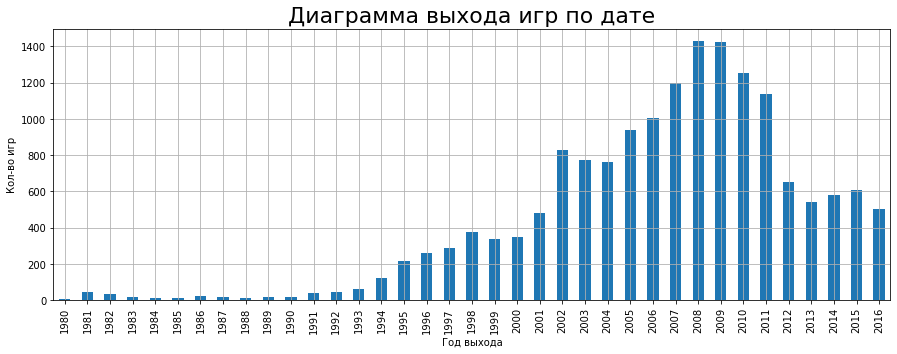

In [18]:
df_raw.groupby('year_of_release')['rating'].count().plot(kind='bar', figsize=(15,5), grid=True)
plt.xlabel('Год выхода')
plt.ylabel('Кол-во игр')
plt.title('Диаграмма выхода игр по дате', fontsize=22)
plt.show();

Для дальнейшего исследования возьмем игры выпущенные с 2013 года.

In [19]:
df_period = df_raw.query("year_of_release >= 2013")

### Продажи по платформам

Выберем платформы с самыми высокими продажами

In [20]:
df_period.groupby('platform')['region_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: region_sales, dtype: float64

In [21]:
lst_consol = (
    df_period
    .groupby('platform')['region_sales']
    .sum().sort_values(ascending=False)
    .head(5).index.tolist()
)
lst_consol

['PS4', 'PS3', 'XOne', '3DS', 'X360']

К сожалению, платформа PC, не попала в топ. Самые прибыльные - это игровые консоли: PS4, PS3, XOne, 3DS, X360

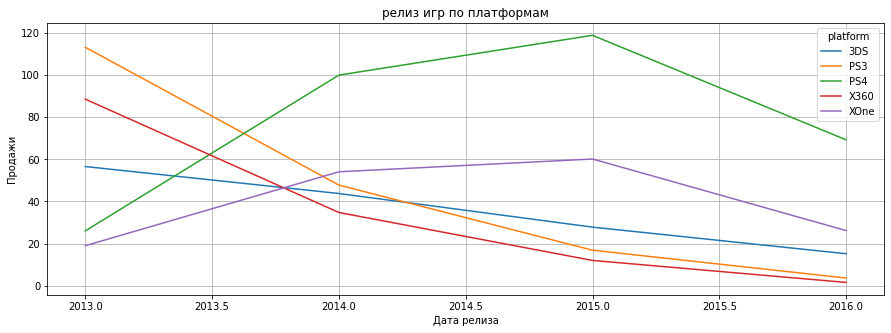

In [22]:
df_consol_2001 = df_period.query(" platform in @lst_consol")

(
    df_consol_2001
    .pivot_table(index='year_of_release', columns='platform', values='region_sales', aggfunc='sum')
    .plot(
        figsize=(15,5),
        grid=True,
        title='релиз игр по платформам',
    )
)
plt.xlabel('Дата релиза')
plt.ylabel('Продажи')
plt.show();

В описании к данным сказано, что информация за 2016 год не полная. Построим графики по всем платформам.

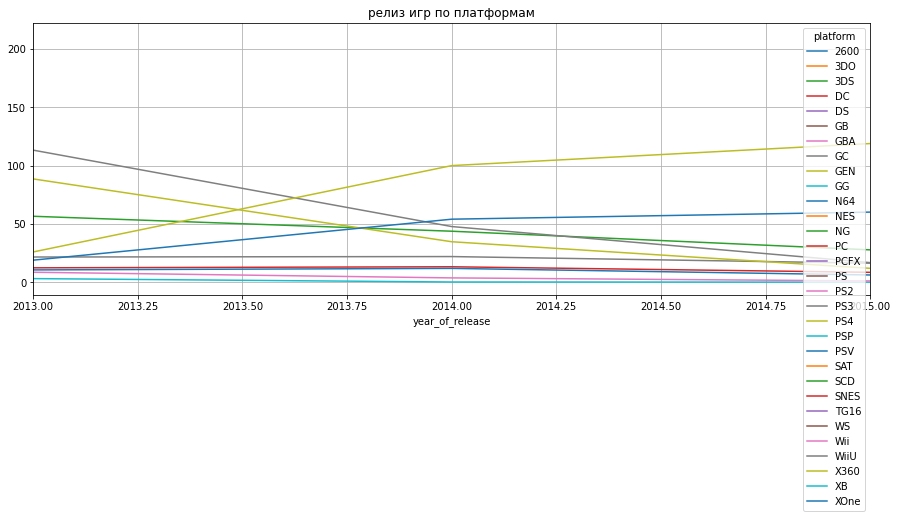

In [23]:
(
    df_raw
    .pivot_table(index='year_of_release', columns='platform', values='region_sales', aggfunc='sum')
    .plot(
        figsize=(15,5),
        grid=True,
        title='релиз игр по платформам',
        xlim=(2013,2015)
    )
)
plt.show();

Есть две платформы, которые показывают рост. Найдем их.

In [24]:
(
    df_raw
    .pivot_table(index=['platform', 'year_of_release'],  values='region_sales', aggfunc='sum')
    .reset_index()
    .query(" 2014 <= year_of_release <= 2015  ")
    .query(" 50 <= region_sales") # эти графики выше отметки 50
)

,platform,year_of_release,region_sales
154,PS4,2014,100.00
155,PS4,2015,118.90
235,XOne,2014,54.07
236,XOne,2015,60.14


Рост показывают PS4 и XOne

Найдем все платформы, которые обладают потенциалом и на 2017 год. Изучим срез продаж от 5 млн. копий

In [25]:
# ============================================================================
top_2013 = (
    df_raw
    .pivot_table(index=['platform', 'year_of_release'],  values='region_sales', aggfunc='sum')
    .reset_index()
    
    # срез по периоду с 2013 по 2015. т.к. 2016 - не полный
    .query(" 2013 <= year_of_release <= 2015  ")
    
    # эти графики выше отметки 5 млн.
    .query(" 5 <= region_sales") 
    
    # выбераеам столбец платформы и продажи
    [['platform', 'region_sales']]
)
# выводим результат
display(top_2013)
# ============================================================================

# создаем словарь
top_plat = dict()

# перебераем названия платформ
for i in top_2013['platform'].unique():
    # суммируем продажи по платформам
    top_plat[i] = top_2013[ top_2013['platform']==i ]['region_sales'].sum()
    
top_plat = pd.Series(data=top_plat)
top_plat.sort_values(ascending=False)

,platform,region_sales
14,3DS,56.57
15,3DS,43.76
16,3DS,27.78
115,PC,12.38
116,PC,13.28
117,PC,8.52
149,PS3,113.25
150,PS3,47.76
151,PS3,16.82
153,PS4,25.99


PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.11
WiiU     60.03
PC       34.18
PSV      28.74
Wii       8.59
dtype: float64

Найдем жизненный цикл всех платформ

In [26]:
# группируем по платформам и годам релиза
plat_cycle = (
    df_raw
    
    # срез по годам релиза с 2013 года
    .query("2013 <= year_of_release")
    
    .pivot_table(index=['platform', 'year_of_release'], values='name', aggfunc='count')
)

# убираем индексы
plat_cycle = plat_cycle.reset_index()

# создаем сериес из словаря. в словарь добавляем ключ=платформа, значение=кол-во лет
life_cycle = dict()

for i in plat_cycle['platform'].unique():
    life_cycle[i] = plat_cycle[ plat_cycle['platform'] == i ]['year_of_release'].count()

plat_cycle = pd.Series(life_cycle)
print(plat_cycle.sort_values(ascending=False))

print(plat_cycle[1:].median())
print(plat_cycle[1:].mean().round(1))

3DS     4
PC      4
PS3     4
PS4     4
PSV     4
Wii     4
WiiU    4
X360    4
XOne    4
PSP     3
DS      1
dtype: int64
4.0
3.6


In [27]:
plat_cycle = (
    df_raw
    .query("2013 <= year_of_release")
    .pivot_table(index=['platform', 'year_of_release'], values='name', aggfunc='count')
)
plat_cycle.groupby('platform')['name'].count().sort_values(ascending=False)

platform
3DS     4
PC      4
PS3     4
PS4     4
PSV     4
Wii     4
WiiU    4
X360    4
XOne    4
PSP     3
DS      1
Name: name, dtype: int64

Жизненный цикл платформ составляет 4 года.

#### Вывод
- Характерный срок жизни популярных игровых платформ составляет 4 года.
- Продажи на конец 2015 года падают.
- Пик игровой индустрии, судя по графикам, приходится на период 2006-2011 годов.
- Потенциал по выручке показывают платформы PS4 и XOne. Так же, все еще в строю, оказались платформы:
** PS3,
** X360,
** 3DS

###  «ящик с усами»

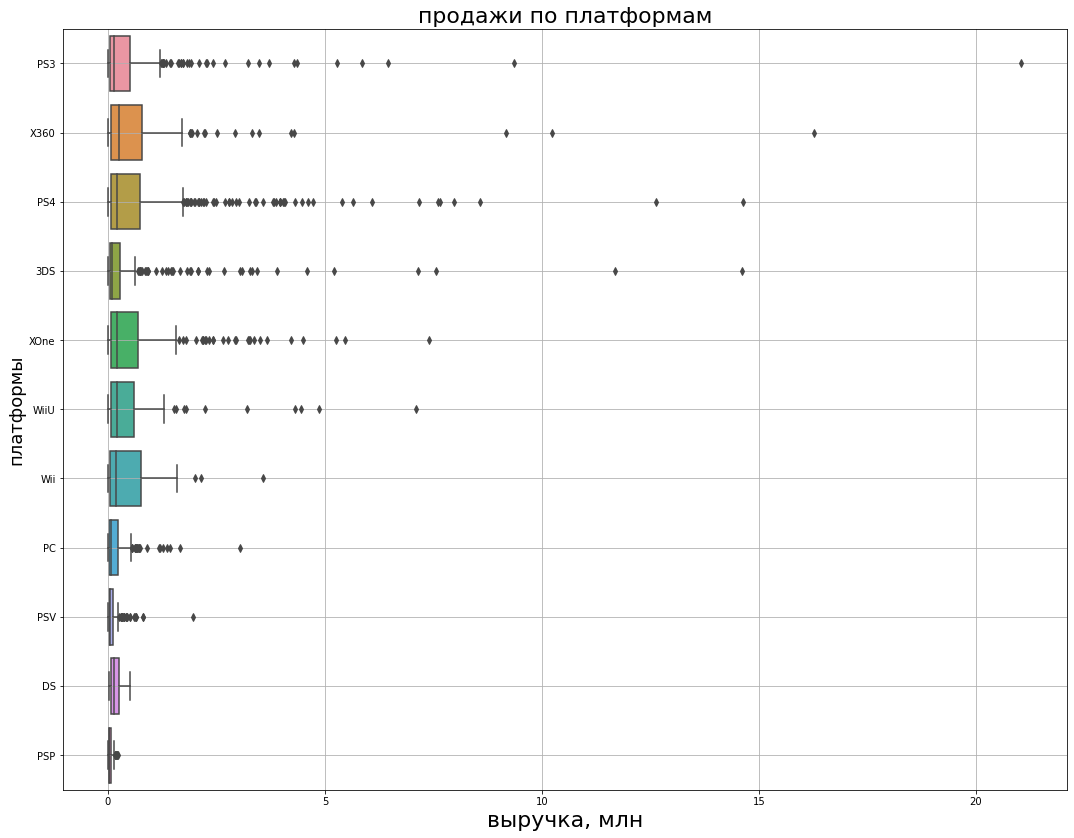

In [28]:
plt.figure(figsize=(18,14))

ax = sns.boxplot(
    y="platform",
    x="region_sales",
    data=df_period,
    orient='h',
)

ax.grid(which='both')
plt.xlabel('выручка, млн', fontsize=22)
plt.ylabel('платформы', fontsize=18)
plt.title('продажи по платформам', fontsize=22)
# ax.set(xlim=(0,1))

plt.show()

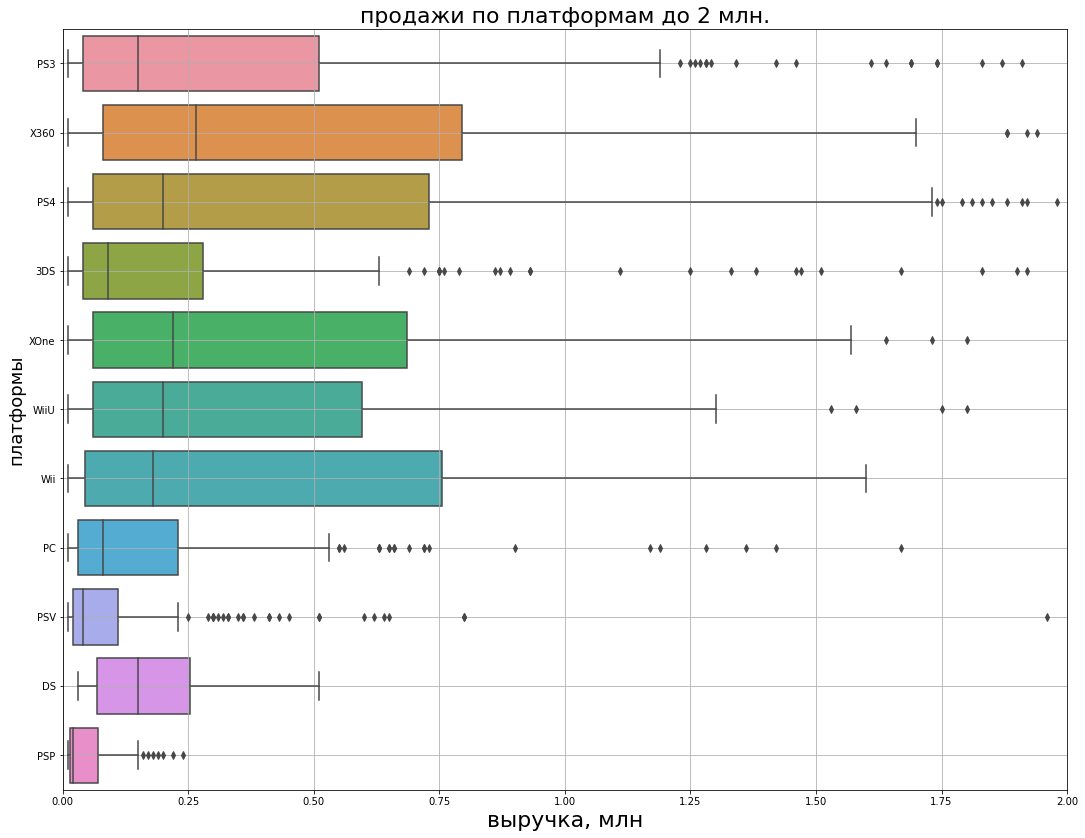

In [29]:
plt.figure(figsize=(18,14))

ax = sns.boxplot(
    y="platform",
    x="region_sales",
    data=df_period,
    orient='h',
)

ax.grid(which='both')
plt.xlabel('выручка, млн', fontsize=22)
plt.ylabel('платформы', fontsize=18)
plt.title('продажи по платформам до 2 млн.', fontsize=22)
ax.set(xlim=(0,2))

plt.show()

In [30]:
df_period['region_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: region_sales, dtype: float64

#### Вывод
В игровой индустрии полагаются на хиты - это хорошо видно по выбросам. Рядовые игры приносят до 1 млн. выручки. 

### продажи внутри одной популярной платформы

In [31]:
def get_corr_table(data_f, title=None, size=(12, 10)):
    """ Строит цветастую таблицу корреляции всего датафрейма """
    pirson = data_f.corr().round(2)

    # Plot
    plt.figure(figsize=size)
    sns.heatmap(
        pirson,
        yticklabels=pirson.index,
        cmap='RdYlGn', center=0,
        annot=True)

    # Decorations
    plt.title(title, fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [32]:
def get_corr_column(data_f, col, title=None, size=(3, 8)):
    """ строит цветастую таблицу коррелиции для датафрейма
    и вытаскивает из него нужный столбец """
    # коэф Пирсона
    pirson = (
        data_f
        .corr()[[col]]
        .round(2).
        sort_values(col, ascending=False)
    )

    pirson = pirson.drop(index=[col])

    # Plot
    plt.figure(figsize=(size))
    sns.heatmap(
        pirson,
        yticklabels=pirson.index,
        cmap='RdYlGn', center=0,
        annot=True)

    # Decorations
    plt.title(f'корреляция по {title}', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=8)
    plt.show()


Определим популярную платформу по количеству выпущенных игр.

In [33]:
(
    df_period
    .pivot_table(index='platform', values='name', aggfunc='count')
    .reset_index()
    .sort_values('name', ascending=False)
)

,platform,name
4,PS4,392
6,PSV,358
3,PS3,345
0,3DS,303
10,XOne,247
2,PC,189
9,X360,186
8,WiiU,115
5,PSP,67
7,Wii,23


Рассмотрим продажи по PS4

In [34]:
df_ps = df_period.query(" platform == 'PS4'")

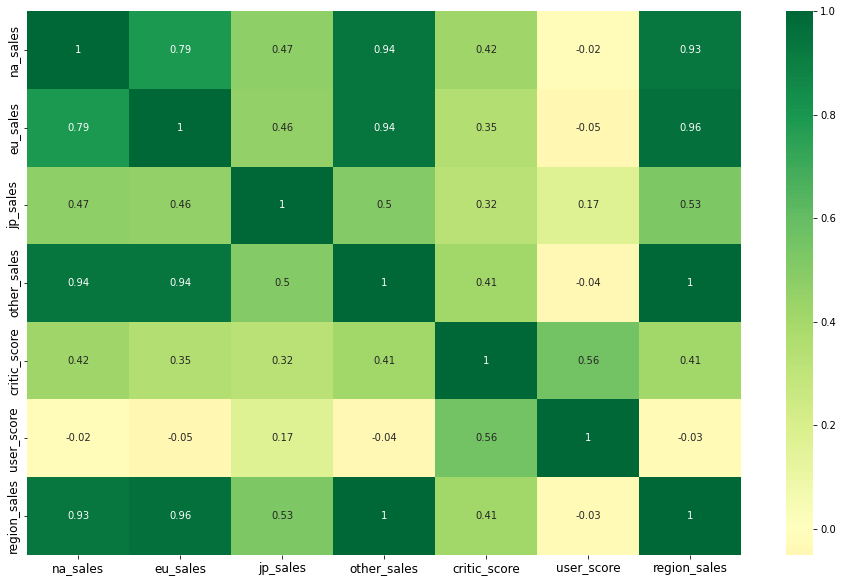

In [35]:
get_corr_table(
    df_ps[
        ['na_sales',
         'eu_sales',
         'jp_sales',
         'other_sales',
         'critic_score',
         'user_score',
         'rating',
         'region_sales'
        ]
    ],
    size=(16, 10)
)

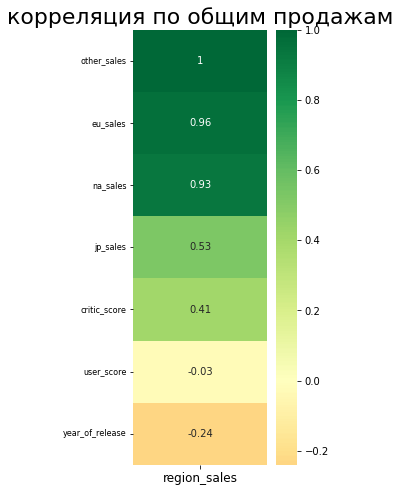

In [36]:
get_corr_column(df_ps, 'region_sales', title='общим продажам')

Умеренная линейная корреляция между продажами и отзывами критиков. Построим диаграммы рассеивания

C:\Users\Alex\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


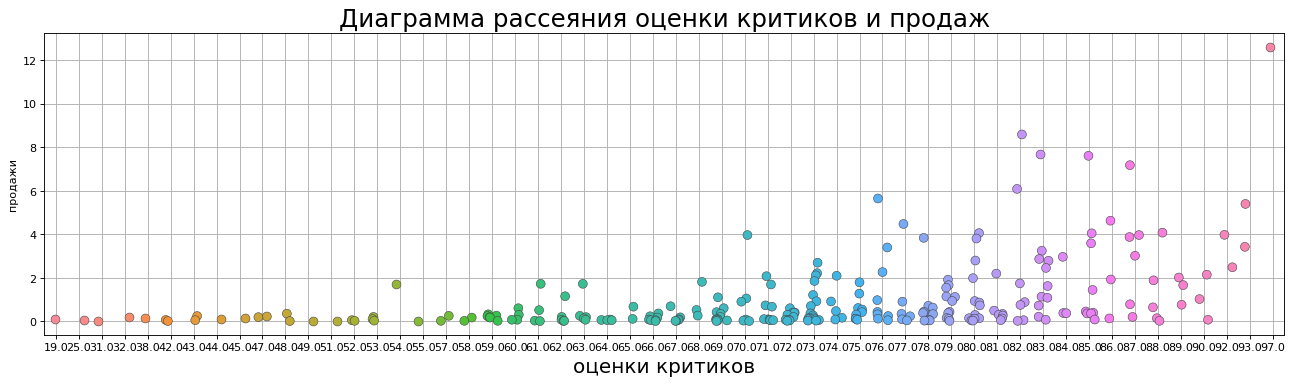

In [37]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(20,5), dpi= 80) 

sns.stripplot(df_ps['critic_score'], df_ps['region_sales'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Диаграмма рассеяния оценки критиков и продаж', fontsize=22)
plt.xlabel('оценки критиков', fontsize=18)
plt.ylabel('продажи')
ax.grid()

plt.show()

C:\Users\Alex\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


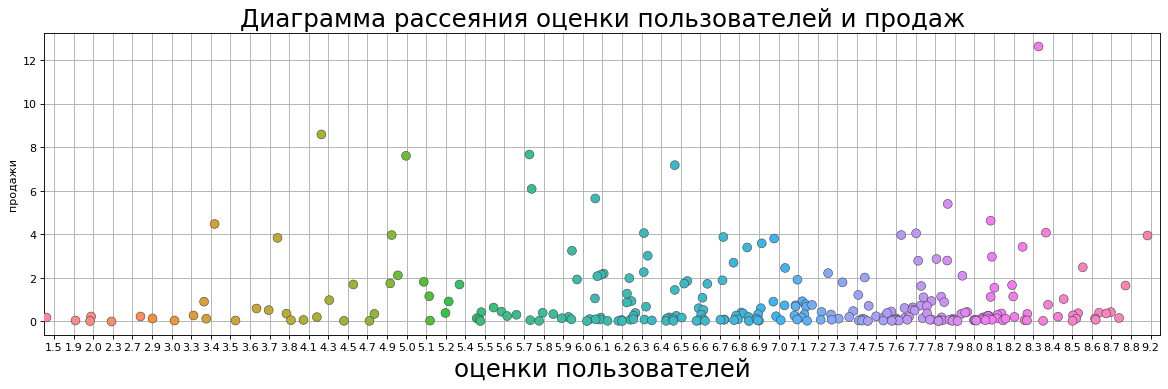

In [38]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(18,5), dpi= 80)    
sns.stripplot(df_ps['user_score'], df_ps['region_sales'], jitter=0.5, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Диаграмма рассеяния оценки пользователей и продаж', fontsize=22)
plt.xlabel('оценки пользователей', fontsize=22)
plt.ylabel('продажи')
ax.grid()
plt.show()

#### Вывод
Оценки критиков умеренно влияют на продажи игр

### продажи на остальных платформах

In [39]:
for plat in df_period['platform'].unique().tolist():
    
    print(f'======{plat}=====')
    print(
        df_period
        .query("platform == @plat")
        .corr()
        .loc[ ['critic_score', 'user_score'] ,'region_sales' ]
        .round(2)
        .sort_values(ascending=False)
    )    
    print()

======PS3=====
critic_score    0.33
user_score      0.00
Name: region_sales, dtype: float64

======X360=====
critic_score    0.35
user_score     -0.01
Name: region_sales, dtype: float64

======PS4=====
critic_score    0.41
user_score     -0.03
Name: region_sales, dtype: float64

======3DS=====
critic_score    0.36
user_score      0.24
Name: region_sales, dtype: float64

======XOne=====
critic_score    0.42
user_score     -0.07
Name: region_sales, dtype: float64

======WiiU=====
user_score      0.42
critic_score    0.38
Name: region_sales, dtype: float64

======Wii=====
user_score      0.68
critic_score     NaN
Name: region_sales, dtype: float64

======PC=====
critic_score    0.20
user_score     -0.09
Name: region_sales, dtype: float64

======PSV=====
critic_score    0.25
user_score      0.00
Name: region_sales, dtype: float64

======DS=====
critic_score   NaN
user_score     NaN
Name: region_sales, dtype: float64

======PSP=====
user_score     -1.0
critic_score    NaN
Name: region_sales

Рассмотрим чем вызвана обратная корреляция -1 у платформы PSP.

In [40]:
(
    df_period
    
    # срез по платформам
    .query("platform == 'PSP'")
    
    # срез по непустым значениям
    .query("~user_score.isna()")
    
    [['platform', 'user_score']]
)

,platform,user_score
7875,PSP,3.4
8969,PSP,8.3


Малое количество оценок. Недостаточно, для вывода о взаимосвязи.

Модифицируем функцию, описанную выше и посмотрим на все оценки.

In [41]:
# пустой сериес
df_plat_corr = pd.Series(index=['critic_score', 'user_score'])

# проходим по всем платформам
for plat in df_period['platform'].unique().tolist():
    
    
    df_temp = (
        df_period
        
#         срез по платформам
        .query("platform == @plat")
        
        .corr()
        .loc[ ['critic_score', 'user_score'] ,'region_sales' ]
        .round(2)
        .sort_values(ascending=False)
    )
#     соединяем пустой сериес с df_temp
    df_plat_corr = pd.concat([df_plat_corr, df_temp], axis=1)
    
# удаляем столбец 0. появился от пустого сериес в начале
del df_plat_corr[0]

# переименовываем столбцы
df_plat_corr.columns = df_period['platform'].unique()


for plat in df_plat_corr.columns:
    # добавляем строки
    
    df_plat_corr.loc['Кол-во игр', plat] = len( df_period.query(" platform == @plat "))
    
    df_plat_corr.loc['Кол-во оценок критиков', plat] = (
            len( df_period.query(" platform == @plat ")
            .query("~critic_score.isna()") )
        )
    
    df_plat_corr.loc['Кол-во оценок пользователей', plat] = (
            len(df_period.query(" platform == @plat ")
            .query("~user_score.isna()"))
        )

df_plat_corr


C:\Users\Alex\AppData\Local\Temp/ipykernel_3224/250601476.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_plat_corr = pd.Series(index=['critic_score', 'user_score'])


,PS3,X360,PS4,3DS,XOne,WiiU,Wii,PC,PSV,DS,PSP
critic_score,0.33,0.35,0.41,0.36,0.42,0.38,NaN,0.20,0.25,NaN,NaN
user_score,0.00,-0.01,-0.03,0.24,-0.07,0.42,0.68,-0.09,0.00,NaN,-1.0
Кол-во игр,345.00,186.00,392.00,303.00,247.00,115.00,23.00,189.00,358.00,8.0,67.0
Кол-во оценок критиков,121.00,81.00,252.00,71.00,169.00,70.00,0.00,149.00,77.00,0.0,1.0
Кол-во оценок пользователей,186.00,143.00,257.00,80.00,182.00,80.00,7.00,155.00,99.00,1.0,2.0


Wii, DS, PSP имеют малое количество оценок, чтобы делать выводы о взаимосвязи

In [42]:
# много раз проверял, надоело, что выдает ошибку. заключил в try-except
try:
    del df_plat_corr['Wii']
    del df_plat_corr['DS']
    del df_plat_corr['PSP']
except:
    pass

In [43]:
print('таблица корреляции продаж от оценок')
df_plat_corr

таблица корреляции продаж от оценок


,PS3,X360,PS4,3DS,XOne,WiiU,PC,PSV
critic_score,0.33,0.35,0.41,0.36,0.42,0.38,0.20,0.25
user_score,0.00,-0.01,-0.03,0.24,-0.07,0.42,-0.09,0.00
Кол-во игр,345.00,186.00,392.00,303.00,247.00,115.00,189.00,358.00
Кол-во оценок критиков,121.00,81.00,252.00,71.00,169.00,70.00,149.00,77.00
Кол-во оценок пользователей,186.00,143.00,257.00,80.00,182.00,80.00,155.00,99.00


#### Вывод
- На остальных платформах умереренная корреляция между продажами и оценками критиков. PC, PCV - показывают слабую взаимосвязь.
- Оценки пользователей, практически, не влияют на продажи. На платформах WiiU, оценки пользователей показывают умеренную корреляцию.

### распределение игр по жанрам

In [44]:
display(
    df_period
    .pivot_table(index='genre', values='region_sales', aggfunc='median' )
    .reset_index()
    .sort_values(by='region_sales', ascending=False)
)

,genre,region_sales
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100
11,Strategy,0.080


#### Вывод
Чем активнее игра, тем большую выручку она приносит(как правило, это шутеры, спортивные игры). Наоборот, чем спокойнее - тем ниже(пазлы, симуляторы).

## Портреты пользователя каждого региона

### популярные платформы

In [45]:
# группируем по платформам
user_plat = (
    df_period
    .pivot_table(
        index='platform',
        values=['na_sales', 'eu_sales', 'jp_sales'],
        aggfunc='sum')

)
user_plat

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


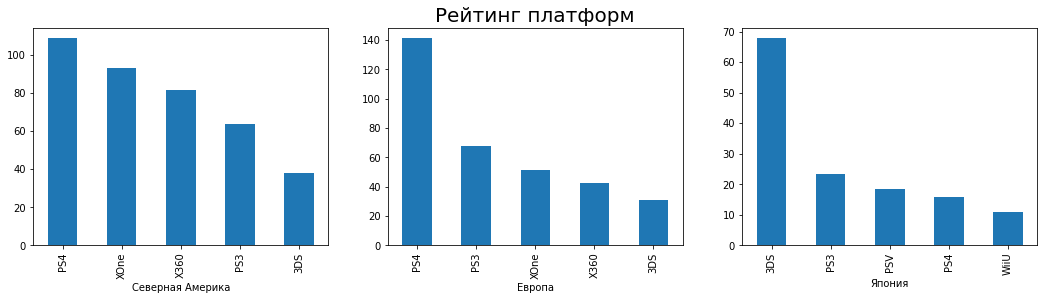

In [46]:
fig = plt.figure(figsize=(18, 4))
grid = plt.GridSpec(1, 3, wspace=0.2)

ax_l = fig.add_subplot(grid[0,0] )
ax_center = fig.add_subplot(grid[0,1])
ax_r = fig.add_subplot(grid[0,2])

# Строим столбчатые диаграммы для каждого региона
user_plat['na_sales'].sort_values(ascending=False).head().plot(kind='bar', y='na_sales', ax=ax_l, legend=False)
user_plat['jp_sales'].sort_values(ascending=False).head().plot(kind='bar', y='jp_sales', ax=ax_r, legend=False)
user_plat['eu_sales'].sort_values(ascending=False).head().plot(kind='bar', y='eu_sales', ax=ax_center, legend=False)

ax_l.set(xlabel='Cеверная Америка')
ax_center.set(xlabel='Европа')
ax_r.set(xlabel='Япония')

ax_center.set(title='Рейтинг платформ')
ax_center.title.set_fontsize(20)

plt.show();

#### Вывод
- Северная Америка отдает предпочтение родным консолям семейства xbox и платформе PS4.
- В Европе любят поиграть в семейство PlayStation.
- Япония, родина Nintendo, все так же отдает предпочтение этому семейству приставок (3DS).

### Популярные жанры

In [47]:
user_genre = (df_period
    .pivot_table(
        index='genre',
        values=['na_sales', 'eu_sales', 'jp_sales'],
        aggfunc='sum')
)
user_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


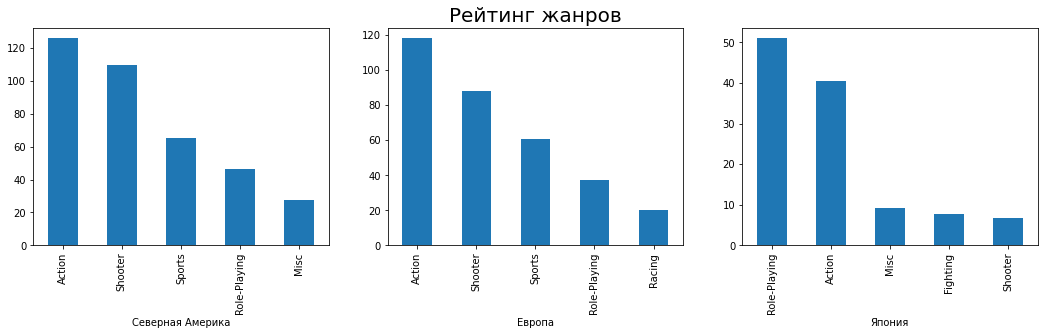

In [48]:
fig = plt.figure(figsize=(18, 4))
grid = plt.GridSpec(1, 3, wspace=0.2)

ax_l = fig.add_subplot(grid[0,0] )
ax_center = fig.add_subplot(grid[0,1])
ax_r = fig.add_subplot(grid[0,2])

# Строим столбчатые диаграммы для каждого региона
user_genre['na_sales'].sort_values(ascending=False).head().plot(kind='bar', y='na_sales', ax=ax_l, legend=False)
user_genre['jp_sales'].sort_values(ascending=False).head().plot(kind='bar', y='jp_sales', ax=ax_r, legend=False)
user_genre['eu_sales'].sort_values(ascending=False).head().plot(kind='bar', y='eu_sales', ax=ax_center, legend=False)

ax_l.set(xlabel='Cеверная Америка')
ax_center.set(xlabel='Европа')
ax_r.set(xlabel='Япония')

ax_center.set(title='Рейтинг жанров')
ax_center.title.set_fontsize(20)

plt.show();

#### Вывод
- В Америке и Европе, популрны динамичекие игры(шутеры, экшены, спорт)
- В Японии популярен ролеплей и экшен.

Азиатский регион всегда славился ролеплеем и mmorpg, в то время, как западная игроиндустрия отдает предпочтение боевикам и спорту.

### Зависимость продаж от рейтинга ESRB

Рассмотрим корреляцию продаж в Североамериканском регионе

In [49]:
df_period[['rating', 'na_sales']].corr()

,na_sales
na_sales,1.0


К сожалению, метод .corr() и диаграммы рассеивания не дадут нам ответа, т.к. рейтинг является строковым типом. Рассмотрим рейтинг [подробнее](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

In [50]:
df_period['rating'].unique().tolist()

['M', 'RP', 'E', 'T', 'E10+']

* RP - нет рейтинга. Заменим на 0
* EC - Игра подходит для детей от 3 лет. Заменим на 3
* E - от 6 лет. Заменим на 6
* E10+ - Для всех от 10 лет и старше. Заменим на 10
* T -  Игра подходит для лиц от 13 лет. Заменим на 13
* M - Материалы игры не подходят для подростков младше 17 лет. Заменим на 17

In [51]:
def rep_rat(row):
    
    if row == 'RP':
        return (0)
    
    elif row == 'EC':
        return (3)
    
    elif row == 'E':
        return (6)
    
    elif row == 'E10+':
        return (10)
    
    elif row == 'T':
        return (13)
    
    elif row == 'M':
        return (17)    

In [52]:
df_period['rating_num'] = df_period['rating'].apply(rep_rat)
df_period['rating_num'].unique()

C:\Users\Alex\AppData\Local\Temp/ipykernel_3224/97453675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['rating_num'] = df_period['rating'].apply(rep_rat)


array([17,  0,  6, 13, 10], dtype=int64)

In [53]:
df_period[['rating_num', 'na_sales', 'eu_sales', 'jp_sales', 'region_sales']].corr().round(2)

,rating_num,na_sales,eu_sales,jp_sales,region_sales
rating_num,1.00,0.19,0.17,-0.08,0.16
na_sales,0.19,1.00,0.77,0.26,0.92
eu_sales,0.17,0.77,1.00,0.24,0.93
jp_sales,-0.08,0.26,0.24,1.00,0.43
region_sales,0.16,0.92,0.93,0.43,1.00


C:\Users\Alex\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


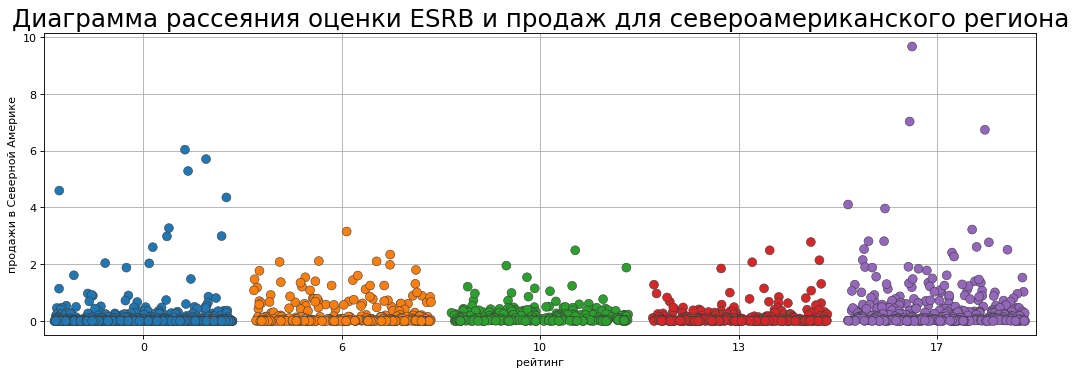

In [54]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(df_period['rating_num'], df_period['na_sales'], jitter=0.45, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Диаграмма рассеяния оценки ESRB и продаж для североамериканского региона', fontsize=22)
plt.xlabel('рейтинг')
plt.ylabel('продажи в Северной Америке')
ax.grid(which='both')
plt.show()

Рассмотрим продажи по регионам в зависимости от рейтинга ESRB

In [55]:
df_esrb = (
    df_period
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
#     .sort_values('region_sales', ascending=False)
)
# df_esrb

for i in df_esrb.columns:
    print(f'===={i}=====')
    display(df_esrb[i].sort_values(ascending=False))


====eu_sales=====


rating
M       145.32
E        83.36
RP       78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

====jp_sales=====


rating
RP      85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

====na_sales=====


rating
M       165.21
RP       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

#### Вывод
- Рейтинг игры не коррелируют с продажами.


- Популярные рейтинги в:
-- Европе: М и Е,
-- Северной Америке: E, M
-- В Японии: T, E, M

##  Проверка гипотез  

типичной статистической гипотезой для первого и второго вопроса является гипотеза о равенстве средних. Используются распределния стьюдента, реализованные в библиотеке scipy

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1:Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [56]:
# срез по xbox
df_xbox = df_period.query(" platform == 'XOne' ")

# срез по PC
df_pc = df_period.query(" platform == 'PC' ")

# убираем NaN, т.к. в p-value может появиться NaN. Проверено
df_xbox = df_xbox.dropna()
df_pc = df_pc.dropna()

Для начала сравним средние двух выборок, а затем использцем распределения стьюдента. Метод реализован в библиотеке scipy.

In [57]:
print(df_xbox['user_score'].mean().round(2))
print(df_pc['user_score'].mean().round(2))

6.54
6.3


Средние равны. Гипотеза подтверждена. Воспользуемся методом ttest_ind()

In [58]:
alpha = .05 # статистическая зачимость 5%

#  Выборка считается достаточно большой(больше 30), поэтому считаем, что дисперсия у выборок не равна
# и принимаем equal_var=False
results = st.ttest_ind(df_xbox['user_score'], df_pc['user_score'], equal_var=False)
print('уровень значимости p-value=', f'{round(results.pvalue*100,2)} %')

if results.pvalue < alpha:
    print('отвергаем H0')
else:
    print('не получилось отвергнуть H0')

уровень значимости p-value= 17.88 %
не получилось отвергнуть H0


#### Вывод
гипотеза `'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые'` подтверждена

### Средние пользовательские рейтинги жанров Action и Sports разные

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Ее опровержение считается подтверждением изначальной гипотезы.
- H1: Средние пользовательские рейтинги жанров Action и Sports разные




In [59]:
# срез по Action
df_act = df_period.query(" genre == 'Action' ")

# срез по PC
df_sport = df_period.query(" genre == 'Sports' ")

# убираем NaN, т.к. в p-value может появиться NaN. Проверено
df_act = df_act.dropna()
df_sport = df_sport.dropna()

In [60]:
# сравним средние двух выборок
print(df_act['user_score'].mean().round(2))
print(df_sport['user_score'].mean().round(2))

6.94
5.67


Средние отличаются. Посмотрим на ttest

In [61]:
alpha = .05 # статистическая зачимость 5%

#  Выборка считается достаточно большой(больше 30), поэтому считаем, что дисперсия у выборок не равна
# и принимаем equal_var=False
results = st.ttest_ind(df_act['user_score'], df_sport['user_score'], equal_var=False)
print('уровень значимости p-value=', f'{round(results.pvalue*100,2)} %')

if results.pvalue < alpha:
    print('отвергаем H0')
else:
    print('не получилось отвергнуть H0')

уровень значимости p-value= 0.0 %
отвергаем H0


#### Вывод
гипотеза `'Средние пользовательские рейтинги жанров Action и Sports разные'` подтверждена

## ИТОГ
* Для максимазации выручки с рекламных компаний, стоит делать упор на платформы PS4 и XOne. Не помешает уделить внимание консолям PS3, X360, 3DS. В будущем, на молодые платформы. Жизненный цикл новых платформ составляет 4 года.

* Необходимо учитавать регион продаж. Так Североамериканский регион и Европа играет на семействах xbox и PS. Предпочитают шутеры, спорт и экшен.
* Япония отдает дань традициям и играет на семействе Nintendo в ролеплейные игры(например, DnD).  


* Игроки в умеренной степени учитывают рейтинги критиков.


* Популярные рейтинги ESRB: `E` и `M`. (`E` - от 6 лет, `M` от 17 лет). Рейтингш ESRB имеет слабую корреляцию с продажами.


* Проверены гипотезы.


* В процессе работы даны краткие выводы.